# ⚽⚽ Playing with Statsbomb data ⚽⚽

🎊 Using Statsbomb to load World Cup 2018 data. Let's see what can we do with this data 🎊

### What are we doing here?

Let's Use some StatsBomb data for World Cup 2018 and find something interesting!

### DATA

We will be use the <a href='https://github.com/statsbomb/open-data'>StatsBomb open-data</a> from Github to work on.

In [45]:
# Imports
import json
import os
import matplotlib.pyplot as plt
import numpy as np
from pandas import json_normalize
from matplotlib.patches import Arc
from mplsoccer import Pitch

## ⚽Getting the data ready

Using json library, lets get the data ready.

In [3]:
# Now lets set the competition id manually
# Men's International World Cup has competition id = 43

competition_id = 43

In [4]:
# Now lets load the competitions json file
with open('statsbomb/data/competitions.json') as f:
    competitions = json.load(f)
    
competitions[0]

{'competition_id': 16,
 'season_id': 4,
 'country_name': 'Europe',
 'competition_name': 'Champions League',
 'competition_gender': 'male',
 'season_name': '2018/2019',
 'match_updated': '2021-04-19T17:36:05.724116',
 'match_available': '2021-04-19T17:36:05.724116'}

In [5]:
# Now let's get the matches for competition 43
location=os.listdir('statsbomb/data/matches/'+str(competition_id)+'/')
for i in location:
    filename=i
    break
with open('statsbomb/data/matches/'+str(competition_id)+'/'+filename) as f:
    matches = json.load(f)
    
matches[0]

{'match_id': 7581,
 'match_date': '2018-07-01',
 'kick_off': '20:00:00.000',
 'competition': {'competition_id': 43,
  'country_name': 'International',
  'competition_name': 'FIFA World Cup'},
 'season': {'season_id': 3, 'season_name': '2018'},
 'home_team': {'home_team_id': 785,
  'home_team_name': 'Croatia',
  'home_team_gender': 'male',
  'home_team_group': None,
  'country': {'id': 56, 'name': 'Croatia'},
  'managers': [{'id': 307,
    'name': 'Zlatko DaliÄ‡',
    'nickname': None,
    'dob': None,
    'country': {'id': 56, 'name': 'Croatia'}}]},
 'away_team': {'away_team_id': 776,
  'away_team_name': 'Denmark',
  'away_team_gender': 'male',
  'away_team_group': None,
  'country': {'id': 61, 'name': 'Denmark'},
  'managers': [{'id': 641,
    'name': 'Ã…ge Fridtjof Hareide',
    'nickname': 'Ã…ge Hareide',
    'dob': None,
    'country': {'id': 171, 'name': 'Norway'}}]},
 'home_score': 1,
 'away_score': 1,
 'match_status': 'available',
 'match_status_360': 'unscheduled',
 'last_updat

## ⚽Visualising the Matche Results :
Let's create a function that will:
1. Display all the matches
2. Display in a grid of 5 per row
3. visualise the goals scored by each team

In [6]:
def show_25_matches(home_teams, away_teams, home_scores, away_scores):
    '''
    Function to display the results(goals) of 25 World Cup matches
    '''
    plt.figure(figsize=(15,15))
    for i in range(25):
        ax = plt.subplot(5,5,i+1)
        plt.title(home_teams[i]+' vs '+away_teams[i])
        plt.ylim(bottom=1)
        plt.yticks([0,1,2,3,4,5])
        if home_scores[i]<away_scores[i]:
            colors=['r','g']
        elif home_scores[i]>away_scores[i]:
            colors=['g','r']
        else:
            colors=['b','b']
        plt.bar([home_teams[i],away_teams[i]],
                [home_scores[i],away_scores[i]],
                color=colors)
        if home_scores[i]<away_scores[i]:
            ax.get_xticklabels()[0].set_color("red")
            ax.get_xticklabels()[1].set_color("green")
        elif home_scores[i]>away_scores[i]:
            ax.get_xticklabels()[0].set_color("green")
            ax.get_xticklabels()[1].set_color("red")
        else:
            ax.get_xticklabels()[0].set_color("blue")
            ax.get_xticklabels()[1].set_color("blue")
        plt.tight_layout()

def show_matches(home_teams, away_teams, home_scores, away_scores, figwid=15, fighgt=30):
    '''
    Function to display the results(goals) of all World Cup matches
    '''
    plt.figure(figsize=(figwid,fighgt))
    size=len(home_teams)
    rows=int(np.ceil(size/5))
    for i in range(size):
        ax = plt.subplot(rows,5,i+1)
        plt.title(home_teams[i]+' vs '+away_teams[i])
        plt.ylim(bottom=1)
        plt.yticks([0,1,2,3,4,5])
        if home_scores[i]<away_scores[i]:
            colors=['r','g']
        elif home_scores[i]>away_scores[i]:
            colors=['g','r']
        else:
            colors=['b','b']
        plt.bar([home_teams[i],away_teams[i]],
                [home_scores[i],away_scores[i]],
                color=colors)
        if home_scores[i]<away_scores[i]:
            ax.get_xticklabels()[0].set_color("red")
            ax.get_xticklabels()[1].set_color("green")
        elif home_scores[i]>away_scores[i]:
            ax.get_xticklabels()[0].set_color("green")
            ax.get_xticklabels()[1].set_color("red")
        else:
            ax.get_xticklabels()[0].set_color("blue")
            ax.get_xticklabels()[1].set_color("blue")
        plt.tight_layout()

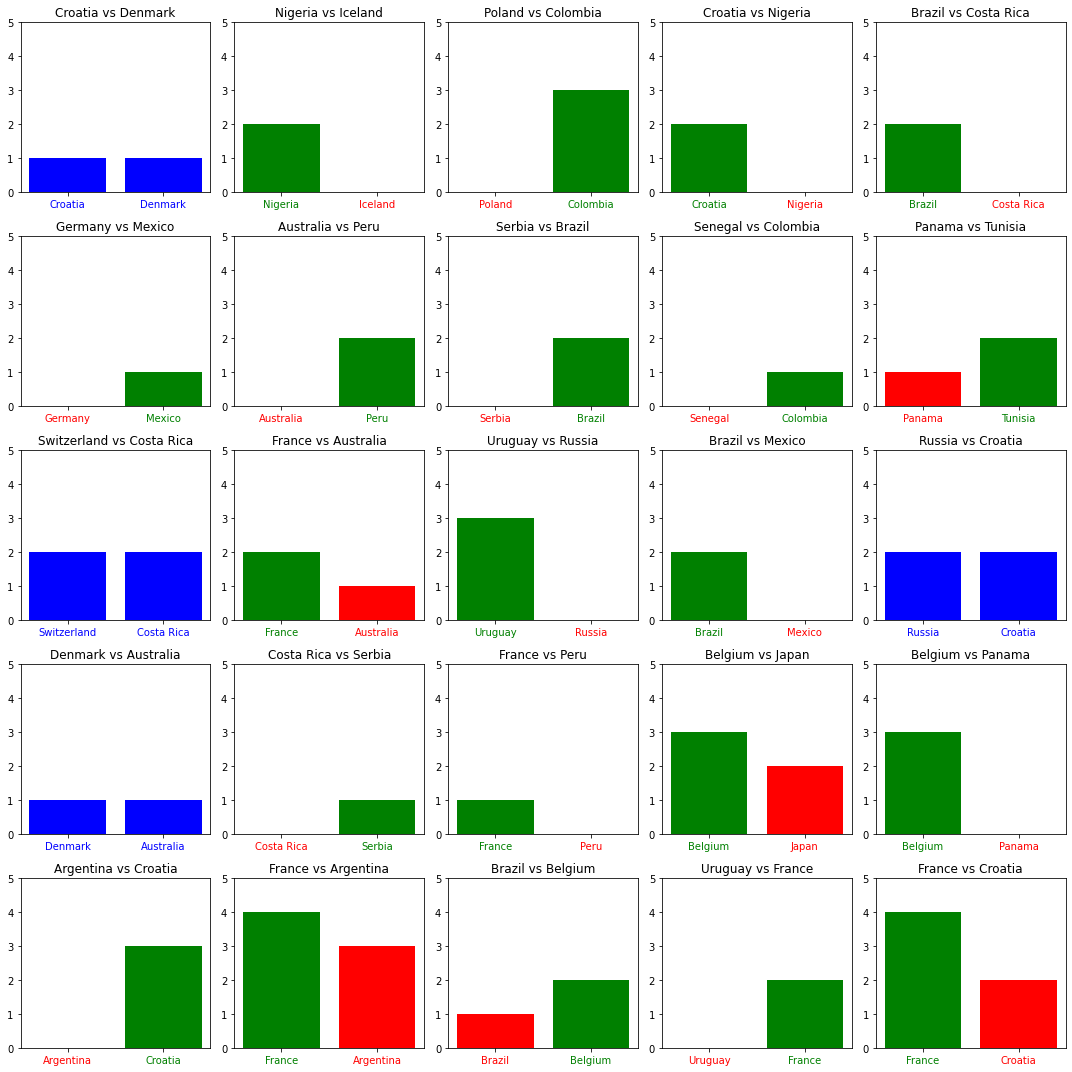

In [7]:
# Let's check each match details
home_teams, away_teams, home_scores, away_scores=[],[],[],[]
for match in matches:
    home_team_name = match['home_team']['home_team_name']
    away_team_name = match['away_team']['away_team_name']
    home_score = match['home_score']
    away_score = match['away_score']
    home_teams.append(home_team_name)
    away_teams.append(away_team_name)
    home_scores.append(home_score)
    away_scores.append(away_score)
show_25_matches(home_teams, away_teams, home_scores, away_scores);
# show_matches(home_teams, away_teams, home_scores, away_scores) ##All Matches

## ⚽Country Specific match results

Lets find country specific match results. PFB the countries that competed in the World Cup 2018

['Croatia', 'Nigeria', 'Poland', 'Croatia', 'Brazil', 'Germany', 'Australia', 'Serbia', 'Senegal', 'Panama', 'Switzerland', 'France', 'Uruguay', 'Brazil', 'Russia', 'Denmark', 'Costa Rica', 'France', 'Belgium', 'Belgium', 'Argentina', 'France', 'Brazil', 'Uruguay', 'France', 'Iceland', 'Poland', 'Denmark', 'Egypt', 'Argentina', 'Spain', 'Belgium', 'Peru', 'Uruguay', 'South Korea', 'Spain', 'Brazil', 'Nigeria', 'Japan', 'Saudi Arabia', 'Uruguay', 'Japan', 'Morocco', 'Iran', 'Russia', 'Sweden', 'Portugal', 'Portugal', 'Mexico', 'Iran', 'England', 'England', 'Colombia', 'Sweden', 'Croatia', 'Sweden', 'South Korea', 'Colombia', 'France', 'Belgium', 'Russia', 'Germany', 'Serbia', 'Tunisia']

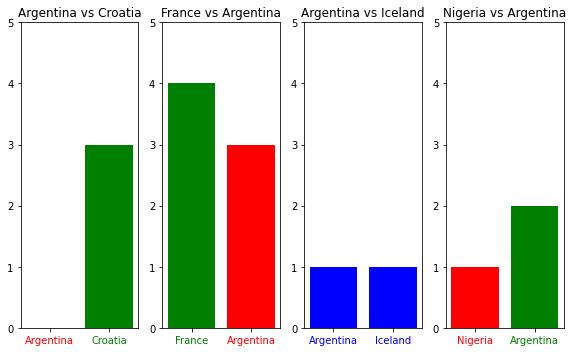

In [30]:
# Manually input the country you are interested
country='Argentina'

# Let's check country specific match details
home_teams, away_teams, home_scores, away_scores=[],[],[],[]
for match in matches:
    home_team_name = match['home_team']['home_team_name']
    away_team_name = match['away_team']['away_team_name']
    if home_team_name==country or away_team_name==country:
        home_score = match['home_score']
        away_score = match['away_score']
        home_teams.append(home_team_name)
        away_teams.append(away_team_name)
        home_scores.append(home_score)
        away_scores.append(away_score)
show_matches(home_teams, away_teams, home_scores, away_scores, figwid=10,fighgt=5) ##All Matches

## ⚽ Matchup between 2 countries

Pick any Two teams and lets see the scores between them. 
* If the match happened, we can visualise the data as well.
* If the match didnt happen, lets check the other teams.

In [9]:
# Let us create a funtion that will output the match ids
def match_id(team1, team2):
    '''
    With team1 and team2 as input the output will the match ids of the two teams.
    '''
    ids=[]
    flag=0
    for match in matches:
        home_team_name = match['home_team']['home_team_name']
        away_team_name = match['away_team']['away_team_name']
        if (home_team_name==team1 or away_team_name==team1) and (home_team_name==team2 or away_team_name==team2):
            ids.append(match['match_id'])
            flag=1
    return ids,flag        

In [10]:
# Let's input the 2 teams
team1='Argentina'
team2='Croatia'

# Get the match id
match_ids,flag = match_id(team1,team2)
if flag:
    print('The Match id(s) are: '+str(match_ids))
else:
    print('The mentioned teams didnt match up in the group stage.')

The Match id(s) are: [7545]


## ⚽Event based Visualisation: Pass Maps

Now let's use the Match ids to explore some event based visuals such as the passing maps and more...

In [11]:
# Some constants to use..

# Argentina vs Croatia match id
match_id_required=7545

# Pitch lengths in yards
pitchLengthX=128
pitchWidthY=80

In [12]:
# Loading the Match data using the match_id
filename = 'statsbomb/data/events/'+str(match_id_required)+'.json'
# print(filename)
with open(filename,encoding='utf-8') as f:
    data=json.load(f)
data

[{'id': '0cda3a8c-dfe2-452c-b16c-43dbce0ab58c',
  'index': 1,
  'period': 1,
  'timestamp': '00:00:00.000',
  'minute': 0,
  'second': 0,
  'type': {'id': 35, 'name': 'Starting XI'},
  'possession': 1,
  'possession_team': {'id': 779, 'name': 'Argentina'},
  'play_pattern': {'id': 1, 'name': 'Regular Play'},
  'team': {'id': 779, 'name': 'Argentina'},
  'duration': 0.0,
  'tactics': {'formation': 3421,
   'lineup': [{'player': {'id': 3659, 'name': 'Wilfredo Daniel Caballero'},
     'position': {'id': 1, 'name': 'Goalkeeper'},
     'jersey_number': 23},
    {'player': {'id': 5742, 'name': 'Gabriel Iván Mercado'},
     'position': {'id': 3, 'name': 'Right Center Back'},
     'jersey_number': 2},
    {'player': {'id': 3090, 'name': 'Nicolás Hernán Otamendi'},
     'position': {'id': 4, 'name': 'Center Back'},
     'jersey_number': 17},
    {'player': {'id': 5507, 'name': 'Nicolás Alejandro Tagliafico'},
     'position': {'id': 5, 'name': 'Left Center Back'},
     'jersey_number': 3},
    

In [13]:
# Now creating a DataFrame and Storing the DataFrame in a dictionary with match id as Key
df = json_normalize(data, sep='_').assign(match_id=filename[-9:-5])

In [14]:
# A dataframe of only Shots
shots = df[df['type_name']=='Shot'].set_index('id')
shots.head()

,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,...,substitution_replacement_id,substitution_replacement_name,shot_aerial_won,ball_recovery_offensive,injury_stoppage_in_chain,pass_goal_assist,pass_deflected,bad_behaviour_card_id,bad_behaviour_card_name,match_id
id,,,,,,,,,,,,,,,,,,,,,
642d964e-e923-4d3b-b1ea-29a70c763539,246,1,00:04:07.700,4,7,9,0.853,16,Shot,785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7545
df181a5e-571f-43d9-87b4-a780fc35b3a7,524,1,00:12:29.180,12,29,20,0.333,16,Shot,779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7545
67a75247-23ad-48bf-8cbc-284cb1e254ce,801,1,00:20:35.260,20,35,35,0.853,16,Shot,785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7545
2844085d-ff13-4277-8511-e001545d8074,1115,1,00:29:13.193,29,13,54,0.760,16,Shot,779,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7545
ecf8e7dc-93a7-47df-baf3-016a35ec80ac,1223,1,00:32:01.260,32,1,57,0.573,16,Shot,785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7545


In [32]:
def createPitch(length,width, unity,linecolor): # in meters
    # Code by @JPJ_dejong

    """
    creates a plot in which the 'length' is the length of the pitch (goal to goal).
    And 'width' is the width of the pitch (sideline to sideline). 
    Fill in the unity in meters or in yards.
    """
    #Set unity
    if unity == "meters":
        # Set boundaries
        if length >= 120.5 or width >= 75.5:
            return(str("Field dimensions are too big for meters as unity, didn't you mean yards as unity?\
                       Otherwise the maximum length is 120 meters and the maximum width is 75 meters. Please try again"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            #Left Penalty Area
            plt.plot([16.5 ,16.5],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([0,16.5],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([16.5,0],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-16.5),length],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([(length-16.5), (length-16.5)],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([(length-16.5),length],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Left 5-meters Box
            plt.plot([0,5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([5.5,5.5],[(width/2+7.32/2+5.5),(width/2-7.32/2-5.5)],color=linecolor)
            plt.plot([5.5,0.5],[(width/2-7.32/2-5.5),(width/2-7.32/2-5.5)],color=linecolor)
            
            #Right 5 -eters Box
            plt.plot([length,length-5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([length-5.5,length-5.5],[(width/2+7.32/2+5.5),width/2-7.32/2-5.5],color=linecolor)
            plt.plot([length-5.5,length],[width/2-7.32/2-5.5,width/2-7.32/2-5.5],color=linecolor)
            
            #Prepare Circles
            centreCircle = plt.Circle((length/2,width/2),9.15,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((11,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-11,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=18.3,width=18.3,angle=0,theta1=308,theta2=52,color=linecolor)
            rightArc = Arc((length-11,width/2),height=18.3,width=18.3,angle=0,theta1=128,theta2=232,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
            #Axis titles
    #check unity again
    elif unity == "yards":
        #check boundaries again
        if length <= 95:
            return(str("Didn't you mean meters as unity?"))
        elif length >= 131 or width >= 101:
            return(str("Field dimensions are too big. Maximum length is 130, maximum width is 100"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            #Left Penalty Area
            plt.plot([18 ,18],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([0,18],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([18,0],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-18),length],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([(length-18), (length-18)],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([(length-18),length],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Left 6-yard Box
            plt.plot([0,6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([6,6],[(width/2+7.32/2+6),(width/2-7.32/2-6)],color=linecolor)
            plt.plot([6,0],[(width/2-7.32/2-6),(width/2-7.32/2-6)],color=linecolor)
            
            #Right 6-yard Box
            plt.plot([length,length-6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([length-6,length-6],[(width/2+7.32/2+6),width/2-7.32/2-6],color=linecolor)
            plt.plot([length-6,length],[(width/2-7.32/2-6),width/2-7.32/2-6],color=linecolor)
            
            #Prepare Circles; 10 yards distance. penalty on 12 yards
            centreCircle = plt.Circle((length/2,width/2),10,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((12,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-12,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=20,width=20,angle=0,theta1=312,theta2=48,color=linecolor)
            rightArc = Arc((length-11,width/2),height=20,width=20,angle=0,theta1=130,theta2=230,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
                
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax            

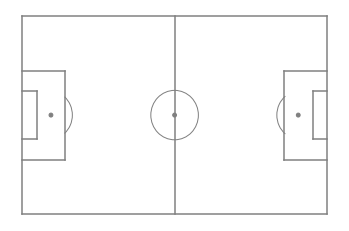

In [47]:
fig,ax = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

In [57]:
# Now lets plot the shots
for i,shot in shots.iterrows():
    x=shot['location'][0]
    y=shot['location'][1]
    goal=shot['shot_outcome_name']=='Goal'
    team_name=shot['team_name']
    
#     circleSize=2
    circleSize=np.sqrt(shot['shot_statsbomb_xg'])*12
    if x==0:
        if (team_name==team1):
            if goal:
                shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
                plt.text((x+1),pitchWidthY-y+1,shot['player_name']) 
            else:
                shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
                shotCircle.set_alpha(.2)
        elif (team_name==team2):
            if goal:
                shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
                plt.text((pitchLengthX-x+1),y+1,shot['player_name']) 
            else:
                shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
                shotCircle.set_alpha(.2)
        ax.add_patch(shotCircle)

    
plt.text(5,75,team2 + ' shots') 
plt.text(80,75,team1 + ' shots') 
     
fig.set_size_inches(10, 7)
fig.savefig('statsbomb/outputs/shots.pdf', dpi=100) 
# plt.show()